In [37]:
import wave
import scipy.fftpack as sf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from midiutil import MIDIFile
%matplotlib inline  

plt.rcParams['figure.figsize'] = [12, 7]

In [38]:
f = wave.open( "out/fiona.wav" )
b = f.readframes(f.getnframes())
[f.getnchannels(), f.getnframes(), f.getframerate(), f.getsampwidth()]

[1, 2067675, 22050, 2]

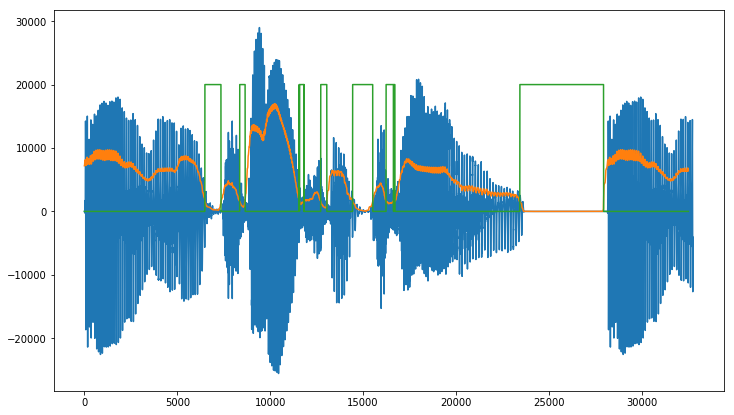

In [39]:
def toInts(d):
    res = []
    
    for i in range(int(len(d)/2)):
        ls = d[2 * i]
        ms = d[2 * i + 1]
        if( ms >= 128 ):
            ms -= 256
        res.append( int( ls + ms * 256 ) )
        
    res2 = np.power(res,2)
    window_size = 256
    window = np.ones(window_size)/float(window_size)
    rms = np.sqrt(np.convolve(res2, window, 'valid'))
    return [res, rms]
[r,rms] = toInts( b [ 0000 : 0000 + 16 * 4096 ])
plt.plot(r)
plt.plot(rms)
plt.plot( 20000 * ( rms < 1600 ) )

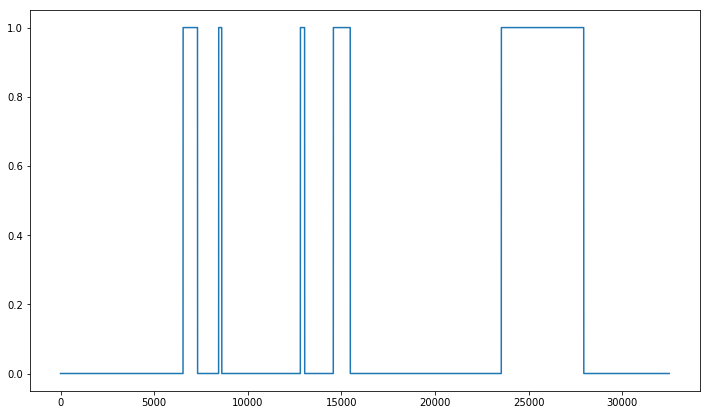

In [40]:
plt.plot(rms < 1000)

In [41]:
[ r, rms ] = toInts(b)

In [69]:
transitions = rms < 1400

In [70]:
l = 1 

track    = 0
channel  = 0
time     = 0    # In beats
duration = 1    # In beats
tempo    = 60   # In BPM

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
MyMIDI.addTempo(track, time, tempo)

# chords Am Fm C B7 Emaj7 BFlat G7 C
chords = [ 
    [ 57, 60, 64 ], # Am
    [ 53, 56, 60 ], # Fm
    [ 60, 64, 67 ], # C 
    [ 57, 59, 63, 66 ], # B6
    [ 52, 56, 59, 63 ], # E maj7
    [ 58, 62, 65 ],
    [ 55, 59, 62, 65 ], 
    [ 60, 64, 67 ]
         ]

for i in range(len(transitions)):
    if( l == 1 and transitions[i] == 0 ):
        time = (i+256) * 1.0 / f.getframerate()
        seconds = int ( time )
        chordn = int(seconds/2) % len(chords)
        chord = chords[chordn]
        nn = i % len(chord)
        n = chord[nn]
        # n -= 12
        n += 12 * ( i % 2 )
        volume = 64
        np = int(i+ f.getframerate() * 0.05 )
        if( np < len(transitions) ):
            volume = int( rms[np] / 16000 * 40 + 64 )
        print( "Down transition at ", i, time, seconds, volume, n, chordn, chord )
        MyMIDI.addNote( track, channel, n, time, 0.1, volume )
    l = transitions[i]
    
with open("out/fionafinal.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

Down transition at  0 0.011609977324263039 0 84 57 0 [57, 60, 64]
Down transition at  7345 0.34471655328798184 0 66 72 0 [57, 60, 64]
Down transition at  8628 0.4029024943310658 0 95 57 0 [57, 60, 64]
Down transition at  11712 0.5427664399092971 0 66 57 0 [57, 60, 64]
Down transition at  13044 0.6031746031746031 0 71 57 0 [57, 60, 64]
Down transition at  15508 0.714920634920635 0 67 60 0 [57, 60, 64]
Down transition at  16569 0.7630385487528345 0 83 69 0 [57, 60, 64]
Down transition at  27945 1.2789569160997731 1 85 69 0 [57, 60, 64]
Down transition at  35483 1.6208163265306121 1 66 76 0 [57, 60, 64]
Down transition at  36766 1.6790022675736962 1 95 60 0 [57, 60, 64]
Down transition at  39850 1.8188662131519275 1 66 60 0 [57, 60, 64]
Down transition at  41182 1.8792743764172335 1 71 60 0 [57, 60, 64]
Down transition at  43600 1.9889342403628119 1 81 60 0 [57, 60, 64]
Down transition at  44452 2.0275736961451245 2 88 56 1 [53, 56, 60]
Down transition at  44458 2.027845804988662 2 88 56 

Down transition at  405117 18.384263038548752 18 89 65 1 [53, 56, 60]
Down transition at  408651 18.544535147392292 18 102 65 1 [53, 56, 60]
Down transition at  413978 18.78612244897959 18 81 60 1 [53, 56, 60]
Down transition at  419115 19.01909297052154 19 66 65 1 [53, 56, 60]
Down transition at  420338 19.07455782312925 19 95 60 1 [53, 56, 60]
Down transition at  423422 19.21442176870748 19 72 60 1 [53, 56, 60]
Down transition at  424834 19.27845804988662 19 84 56 1 [53, 56, 60]
Down transition at  432581 19.629795918367346 19 83 72 1 [53, 56, 60]
Down transition at  433230 19.65922902494331 19 79 53 1 [53, 56, 60]
Down transition at  438564 19.90113378684807 19 66 53 1 [53, 56, 60]
Down transition at  439845 19.959229024943312 19 95 65 1 [53, 56, 60]
Down transition at  442929 20.099092970521543 20 69 72 2 [60, 64, 67]
Down transition at  444673 20.178185941043083 20 80 76 2 [60, 64, 67]
Down transition at  448023 20.330113378684807 20 74 72 2 [60, 64, 67]
Down transition at  448988

Down transition at  792944 35.97278911564626 35 102 60 1 [53, 56, 60]
Down transition at  798030 36.20344671201814 36 66 60 2 [60, 64, 67]
Down transition at  799315 36.26172335600907 36 95 76 2 [60, 64, 67]
Down transition at  802399 36.4015873015873 36 66 76 2 [60, 64, 67]
Down transition at  803716 36.46131519274376 36 75 64 2 [60, 64, 67]
Down transition at  805706 36.55156462585034 36 79 67 2 [60, 64, 67]
Down transition at  806154 36.571882086167804 36 82 60 2 [60, 64, 67]
Down transition at  812770 36.87192743764172 36 76 64 2 [60, 64, 67]
Down transition at  815729 37.00612244897959 37 79 79 2 [60, 64, 67]
Down transition at  816541 37.04294784580499 37 87 76 2 [60, 64, 67]
Down transition at  819654 37.18412698412698 37 85 60 2 [60, 64, 67]
Down transition at  820121 37.20530612244898 37 82 79 2 [60, 64, 67]
Down transition at  825402 37.444807256235826 37 70 60 2 [60, 64, 67]
Down transition at  827401 37.53546485260771 37 82 76 2 [60, 64, 67]
Down transition at  831229 37.70

Down transition at  1142555 51.828163265306124 51 67 72 1 [53, 56, 60]
Down transition at  1142782 51.83845804988662 51 66 56 1 [53, 56, 60]
Down transition at  1142824 51.84036281179138 51 66 56 1 [53, 56, 60]
Down transition at  1144076 51.89714285714286 51 85 60 1 [53, 56, 60]
Down transition at  1148505 52.09800453514739 52 64 72 2 [60, 64, 67]
Down transition at  1150419 52.18480725623583 52 72 72 2 [60, 64, 67]
Down transition at  1154445 52.367392290249434 52 77 72 2 [60, 64, 67]
Down transition at  1156145 52.444489795918365 52 84 79 2 [60, 64, 67]
Down transition at  1159993 52.6190022675737 52 66 76 2 [60, 64, 67]
Down transition at  1161247 52.675873015873016 52 95 76 2 [60, 64, 67]
Down transition at  1164338 52.816054421768705 52 67 67 2 [60, 64, 67]
Down transition at  1164340 52.816145124716556 52 67 64 2 [60, 64, 67]
Down transition at  1164381 52.818004535147395 52 66 72 2 [60, 64, 67]
Down transition at  1164389 52.81836734693878 52 66 79 2 [60, 64, 67]
Down transitio

Down transition at  1541192 69.9069387755102 69 64 67 2 [60, 64, 67]
Down transition at  1542710 69.97578231292518 69 66 67 2 [60, 64, 67]
Down transition at  1543993 70.03396825396825 70 95 71 3 [57, 59, 63, 66]
Down transition at  1547077 70.17383219954648 70 65 71 3 [57, 59, 63, 66]
Down transition at  1547596 70.19736961451247 70 78 57 3 [57, 59, 63, 66]
Down transition at  1547704 70.20226757369615 70 79 57 3 [57, 59, 63, 66]
Down transition at  1548488 70.2378231292517 70 70 57 3 [57, 59, 63, 66]
Down transition at  1550203 70.31560090702948 70 66 78 3 [57, 59, 63, 66]
Down transition at  1550205 70.31569160997732 70 66 71 3 [57, 59, 63, 66]
Down transition at  1550208 70.3158276643991 70 66 57 3 [57, 59, 63, 66]
Down transition at  1550210 70.31591836734694 70 66 63 3 [57, 59, 63, 66]
Down transition at  1550458 70.32716553287982 70 67 63 3 [57, 59, 63, 66]
Down transition at  1551531 70.3758276643991 70 79 78 3 [57, 59, 63, 66]
Down transition at  1552378 70.4142403628118 70 87

Down transition at  1927057 87.40648526077098 87 69 71 3 [57, 59, 63, 66]
Down transition at  1928510 87.47238095238096 87 84 63 3 [57, 59, 63, 66]
Down transition at  1934427 87.74072562358276 87 70 78 3 [57, 59, 63, 66]
Down transition at  1935037 87.76839002267573 87 92 71 3 [57, 59, 63, 66]
Down transition at  1935104 87.77142857142857 87 92 57 3 [57, 59, 63, 66]
Down transition at  1935152 87.77360544217687 87 93 57 3 [57, 59, 63, 66]
Down transition at  1935155 87.77374149659865 87 93 78 3 [57, 59, 63, 66]
Down transition at  1935213 87.77637188208617 87 94 71 3 [57, 59, 63, 66]
Down transition at  1942199 88.09319727891156 88 65 75 4 [52, 56, 59, 63]
Down transition at  1942667 88.11442176870749 88 73 75 4 [52, 56, 59, 63]
Down transition at  1942947 88.1271201814059 88 84 75 4 [52, 56, 59, 63]
Down transition at  1942979 88.12857142857143 88 85 75 4 [52, 56, 59, 63]
Down transition at  1942983 88.12875283446712 88 85 75 4 [52, 56, 59, 63]
Down transition at  1943669 88.15986394

In [45]:
start = 20 * f.getframerate()
[qr,qrms] = toInts( b[ start : start + 16 * 4096 ])
plt.plot(qr)
plt.plot(qrms)
plt.plot( 20000 * ( qrms < 1600 ) )

AttributeError: 'int' object has no attribute 'power'